In [20]:
import matplotlib.pyplot as plt
import numpy as np
from alive_progress import alive_bar
import time, logging
import time
import enlighten

In [3]:
import os
os.chdir(r'C:\Users\user\OneDrive\Desktop\archive (2)\Actor_02')
# !pip install --upgrade librosa

#### We’ll be using librosa for analyzing and extracting features of an audio signal. For playing audio we will use pyAudio so that we can play music on jupyter directly. 
#### https://towardsdatascience.com/how-i-understood-what-features-to-consider-while-training-audio-files-eedfb6e9002b

In [4]:
import librosa
# audio_path = 'C:\Users\user\OneDrive\Desktop\archive (2)\Actor_01'
x , sr = librosa.load("03-01-01-01-01-01-02.wav")
print(type(x), type(sr))
print("\n",x,"\n",sr)

<class 'numpy.ndarray'> <class 'int'>

 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2893076e-06
  1.0079392e-06 -7.8646877e-07] 
 22050


#### Loudness 

In [5]:
max_loudness = max(x)
avg_loudness = sum(x)/len(x)
print("max_loudness : ",max_loudness,"  avg_loudness : ",avg_loudness)

max_loudness :  0.07641673   avg_loudness :  -2.2917680502228186e-07


#### Tempo 

In [6]:
tempo, beat_frames = librosa.beat.beat_track(y=x, sr=sr)
print(tempo, beat_frames)

151.99908088235293 [28 45 62 80]


#### Beat Time 

In [7]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print("Minimum : ",min(beat_times))
print("Maximum : ",max(beat_times))
print("Average : ",sum(beat_times)/len(beat_times))
beat_times

Estimated tempo: 152.00 beats per minute
Minimum :  0.6501587301587302
Maximum :  1.8575963718820863
Average :  1.2480725623582767


array([0.65015873, 1.04489796, 1.43963719, 1.85759637])

#### MFCC 

In [10]:
Mfcc = librosa.feature.mfcc(y=x, sr=sr)
Mfcc_max = (librosa.feature.mfcc(y=x, sr=sr)).sum(axis=1)

print(Mfcc_max.shape)
Mfcc_max = np.array(Mfcc_max)
Mfcc_index_min = np.argmax(Mfcc_max)
print(Mfcc_index_min+1)
Mfcc.shape
# print("Minimum : ",Mfcc.min(axis=0))
# print("Maximum : ",max(Mfcc))
# print("Average : ",sum(Mfcc)/len(Mfcc))


(20,)
2


(20, 157)

#### Zero Crossing 

In [11]:
print(librosa.feature.zero_crossing_rate(x).sum())

42.42041015625


#### Spectral roll off 

In [12]:
S, phase = librosa.magphase(librosa.stft(x))
print(librosa.feature.spectral_rolloff(S=S, sr=sr).sum()/len(librosa.feature.spectral_rolloff(S=S, sr=sr)))

762942.919921875


#### Chroma 

In [13]:
import numpy as np

chroma_axis_max = librosa.feature.chroma_stft(y=x, sr=sr).sum(axis=1)
print(chroma_axis_max)
chroma_axis_max = np.array(chroma_axis_max)
index_min = np.argmax(chroma_axis_max)
print(index_min+1)
# print(chroma_axis_max.index(max(chroma_axis_max)))

[57.64264  57.175594 53.602493 61.819546 61.21636  68.56044  66.108826
 73.06058  70.348015 63.97863  58.649815 52.137665]
8


#### Pitch 

In [14]:
pitches, magnitudes = librosa.piptrack(y=x, sr=sr)
# print(pitches.sum(axis=0))
print("maximum pitch is: ",max(pitches.sum(axis=0)))
print("average pitch is: ",(pitches.sum())/len(pitches.sum(axis=0)))
# print(magnitudes.shape)

maximum pitch is:  240588.94
average pitch is:  46928.9076433121


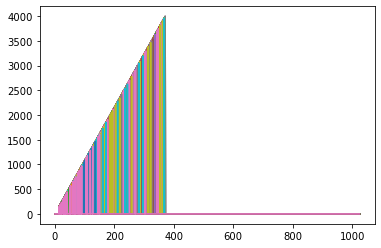

In [15]:
plt.plot(pitches)
plt.show()

In [13]:
# sr is sampling rate i.e. sample taken per second

#### Create Dataframe 

In [16]:
# Import pandas library
import pandas as pd

# initialize list of lists
# data = [['tom', 10], ['nick', 15], ['juli', 14]]

data =[]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Tempo', 'beat_frame_min', 'beat_frame_max', 'beat_frame_average', 'max_loudness', 'avg_loudness', 'MCFF', 'Zero_crossong_sum', 'Spectral-roll off_max', 'Spectral-roll off_avg', 'Chroma', 'Max_Pitch', 'Avg_Pitch', 'Emotion_label'])

# print dataframe.
df


,Tempo,beat_frame_min,beat_frame_max,beat_frame_average,max_loudness,avg_loudness,MCFF,Zero_crossong_sum,Spectral-roll off_max,Spectral-roll off_avg,Chroma,Max_Pitch,Avg_Pitch,Emotion_label


In [26]:
def give_emotion(string):
    x = string.split("-")
    if(int(x[2])==1):
        emotion = "neutral"
    elif(int(x[2])==2):
        emotion = "calm"
    elif(int(x[2])==3):
        emotion = "happy"
    elif(int(x[2])==4):
        emotion = "sad"
    elif(int(x[2])==5):
        emotion = "angry"
    elif(int(x[2])==6):
        emotion = "fearful"
    elif(int(x[2])==7):
        emotion = "disgust"
    elif(int(x[2])==8):
        emotion = "surprised"
    return emotion

#### Getting all the audio files 

In [28]:
import os
from tqdm import trange
 
# Get the list of all files and directories
# path = r'F:\Dataset for Lab Project\archive (2)\Actor_01'
# path = 'C:\Users\user\OneDrive\Desktop\archive (2)\Actor_01'
# dir_list = os.listdir(path)
 
# print("Files and directories in '", path, "' :")

x = []
sr = []
all_filenames = []

f_path = r'C:\Users\user\OneDrive\Desktop\archive (2)'
f_dir_list = os.listdir(f_path)

# Initial call to print 0% progress
# printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)

manager = enlighten.get_manager()
ticks = manager.counter(total=len(f_dir_list), desc="Progress for Actor", unit="actor", color="red")
tocks = manager.counter(total=24*60, desc="Progress for Audio", unit="audio", color="blue")
actor = 0
for i, folders in enumerate(f_dir_list):
      
    dir_list = os.path.join(f_path, folders)

    dir_list1 = os.listdir(dir_list)
    actor = actor+ 1
    
   
    for j, audio_file in enumerate(dir_list1):
        printProgressBar(j + 1,len(dir_list1), prefix = 'Progress: Actor '+str(i+1)+' Audio '+str(j+1), suffix = 'Complete', length = 50)

        tocks.update()
        if(j==len(dir_list1)-1):
            ticks.update()
        row = []
        
#         print("number of audio : ",a, "Actor : ",actor)

        
        filename = os.path.join(dir_list, audio_file)
        x , sr = librosa.load(filename)
        
#         TEMPO AND BEAT_FRAME
        tempo, beat_frames = librosa.beat.beat_track(y=x, sr=sr)
        row.append(tempo)                                                 #1
        
        beat_times = librosa.frames_to_time(beat_frames, sr=sr)
        row.append(min(beat_times))                                       #2
        row.append(max(beat_times))                                       #3
        row.append(sum(beat_times)/len(beat_times))                       #4
        
#         LOUDNESS
        max_loudness = max(x)
        avg_loudness = sum(x)/len(x)
        row.append(max_loudness)                                          #5
        row.append(avg_loudness)                                          #6
        
#         MCFF
        Mfcc = librosa.feature.mfcc(y=x, sr=sr)
        Mfcc_max = (librosa.feature.mfcc(y=x, sr=sr)).sum(axis=1)
        Mfcc_max = np.array(Mfcc_max)
        Mfcc_index_min = np.argmax(Mfcc_max)
        row.append(Mfcc_index_min+1)                                      #7
        
#         ZERO CROSSING SUM
        row.append(librosa.feature.zero_crossing_rate(x).sum())           #8
            
#         SPECTRAL-ROLL OFF_SUM
        S, phase = librosa.magphase(librosa.stft(x))
        row.append(librosa.feature.spectral_rolloff(S=S, sr=sr).max())    #9
        row.append(librosa.feature.spectral_rolloff(S=S, sr=sr).sum()/len(librosa.feature.spectral_rolloff(S=S, sr=sr)))
                                                                          #10
#         CHROMA
        chroma_axis_max = librosa.feature.chroma_stft(y=x, sr=sr).sum(axis=1)
        chroma_axis_max = np.array(chroma_axis_max)
        index_min = np.argmax(chroma_axis_max)
        row.append(index_min+1)                                           #11
        
#         PITCH
        pitches, magnitudes = librosa.piptrack(y=x, sr=sr)
        row.append(max(pitches.sum(axis=0)))                              #12
        row.append((pitches.sum())/len(pitches.sum(axis=0)))              #13
        
#         EMOTION OF AUDIO
        audio = str(audio_file)
        emotion = give_emotion(audio)
        row.append(emotion)                                               #14
    
        df.loc[len(df.index)] = row


In [29]:
df

,Tempo,beat_frame_min,beat_frame_max,beat_frame_average,max_loudness,avg_loudness,MCFF,Zero_crossong_sum,Spectral-roll off_max,Spectral-roll off_avg,Chroma,Max_Pitch,Avg_Pitch,Emotion_label
0,80.749512,0.301859,1.044898,0.673379,0.041009,9.149964e-07,2,53.297852,10174.438477,905245.092773,1,347081.406250,71977.090909,neutral
1,161.499023,0.673379,1.416417,1.044898,0.047185,7.137630e-07,2,54.799316,9183.911133,898149.902344,10,283542.406250,66840.236111,neutral
2,80.749512,0.301859,1.044898,0.673379,0.058744,9.554769e-07,2,56.276367,9270.043945,871448.730469,2,271150.187500,71985.574468,neutral
3,64.599609,0.116100,1.044898,0.580499,0.061837,9.176384e-07,2,54.379395,9280.810547,844672.192383,1,290874.531250,66853.124088,neutral
4,117.453835,0.534059,1.555737,1.044898,0.026036,8.108787e-07,2,54.618652,9291.577148,928716.284180,11,290550.937500,76162.947712,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,80.749512,0.278639,1.021678,0.650159,0.116322,-5.006840e-08,2,45.407227,8893.212891,809616.137695,12,226855.312500,74147.000000,surprised
2876,135.999178,0.603719,2.321995,1.472145,0.247812,-5.587031e-08,2,47.262695,10034.472656,962674.145508,1,205785.562500,71328.188235,surprised
2877,184.570312,0.743039,1.671837,1.207438,0.163341,1.819323e-07,2,48.267090,10798.901367,940645.678711,1,241406.843750,84035.401163,surprised
2878,143.554688,0.603719,1.462857,1.029418,0.250467,-6.728981e-06,2,38.463379,10745.068359,975766.333008,12,236807.125000,53915.037736,surprised


In [30]:
dataset = df
# dataset

In [31]:
data =[]

# Create the pandas DataFrame
training_data = pd.DataFrame(data, columns = ['Tempo', 'beat_frame_min', 'beat_frame_max', 'beat_frame_average', 'max_loudness', 'avg_loudness', 'MCFF', 'Zero_crossong_sum', 'Spectral-roll off_max', 'Spectral-roll off_avg', 'Chroma', 'Max_Pitch', 'Avg_Pitch', 'Emotion_label'])

testing_data = pd.DataFrame(data, columns = ['Tempo', 'beat_frame_min', 'beat_frame_max', 'beat_frame_average', 'max_loudness', 'avg_loudness', 'MCFF', 'Zero_crossong_sum', 'Spectral-roll off_max', 'Spectral-roll off_avg', 'Chroma', 'Max_Pitch', 'Avg_Pitch', 'Emotion_label'])
print(training_data,'\n',testing_data)

Empty DataFrame
Columns: [Tempo, beat_frame_min, beat_frame_max, beat_frame_average, max_loudness, avg_loudness, MCFF, Zero_crossong_sum, Spectral-roll off_max, Spectral-roll off_avg, Chroma, Max_Pitch, Avg_Pitch, Emotion_label]
Index: [] 
 Empty DataFrame
Columns: [Tempo, beat_frame_min, beat_frame_max, beat_frame_average, max_loudness, avg_loudness, MCFF, Zero_crossong_sum, Spectral-roll off_max, Spectral-roll off_avg, Chroma, Max_Pitch, Avg_Pitch, Emotion_label]
Index: []


### Perform Operations on Dataset using dummy data only 

####  Emotion_label-> neutral

In [33]:
data_neutral = dataset[dataset['Emotion_label']=="neutral"]
print(data_neutral.Emotion_label.unique())
print(data_neutral.shape)
training_data = pd.concat([training_data, data_neutral[:67]])
testing_data = pd.concat([testing_data, data_neutral[67:]])

['neutral']
(192, 14)


#### Emotion_label-> calm 

In [34]:
data_calm = dataset[dataset['Emotion_label']=="calm"]
print(data_calm.Emotion_label.unique())
print(data_calm.shape)
training_data = pd.concat([training_data, data_calm[:134]])
testing_data = pd.concat([testing_data, data_calm[134:]])

['calm']
(384, 14)


#### Emotion_label-> happy  

In [35]:
data_happy = dataset[dataset['Emotion_label']=="happy"]
print(data_happy.Emotion_label.unique())
print(data_happy.shape)
training_data = pd.concat([training_data, data_happy[:134]])
testing_data = pd.concat([testing_data, data_happy[134:]])

['happy']
(384, 14)


####  Emotion_label-> sad

In [36]:
data_sad = dataset[dataset['Emotion_label']=="sad"]
print(data_sad.Emotion_label.unique())
print(data_sad.shape)
training_data = pd.concat([training_data, data_sad[:134]])
testing_data = pd.concat([testing_data, data_sad[134:]])

['sad']
(384, 14)


#### Emotion_label-> angry 

In [37]:
data_angry = dataset[dataset['Emotion_label']=="angry"]
print(data_angry.Emotion_label.unique())
print(data_angry.shape)
training_data = pd.concat([training_data, data_angry[:134]])
testing_data = pd.concat([testing_data, data_angry[134:]])

['angry']
(384, 14)


#### Emotion_label-> fearful

In [38]:
data_fearful = dataset[dataset['Emotion_label']=="fearful"]
print(data_fearful.Emotion_label.unique())
print(data_fearful.shape)
training_data = pd.concat([training_data, data_fearful[:134]])
testing_data = pd.concat([testing_data, data_fearful[134:]])

['fearful']
(384, 14)


####  Emotion_label-> disgust

In [39]:
data_disgust = dataset[dataset['Emotion_label']=="disgust"]
print(data_disgust.Emotion_label.unique())
print(data_disgust.shape)
training_data = pd.concat([training_data, data_disgust[:134]])
testing_data = pd.concat([testing_data, data_disgust[134:]])

['disgust']
(384, 14)


#### Emotion_label-> surprised 

In [40]:
data_surprised = dataset[dataset['Emotion_label']=="surprised"]
print(data_surprised.Emotion_label.unique())
print(data_surprised.shape)
training_data = pd.concat([training_data, data_surprised[:134]])
testing_data = pd.concat([testing_data, data_surprised[134:]])

['surprised']
(384, 14)


#### Checking Data is processed properly or not 

In [41]:
training_data.shape

(1072, 14)

In [42]:
testing_data.shape

(2000, 14)

In [43]:
(training_data.Emotion_label.unique())

array(['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust',
       'surprised'], dtype=object)

In [44]:
(testing_data.Emotion_label.unique())

array(['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust',
       'surprised'], dtype=object)

#### Suffling the Data 

In [50]:
print("Data Before Suffling...")
print(training_data.head(5))
print(testing_data.head(5))

training_data = training_data.sample(frac=1)
testing_data = testing_data.sample(frac=1)

print("Data After Suffling...")
print(training_data.head(5))
print(testing_data.head(5))

Data Before Suffling...
         Tempo  beat_frame_min  beat_frame_max  beat_frame_average  \
0    80.749512        0.301859        1.044898            0.673379   
1   161.499023        0.673379        1.416417            1.044898   
2    80.749512        0.301859        1.044898            0.673379   
3    64.599609        0.116100        1.044898            0.580499   
60  151.999081        0.650159        1.857596            1.248073   

    max_loudness  avg_loudness MCFF  Zero_crossong_sum  Spectral-roll off_max  \
0       0.041009  9.149964e-07    2          53.297852           10174.438477   
1       0.047185  7.137630e-07    2          54.799316            9183.911133   
2       0.058744  9.554769e-07    2          56.276367            9270.043945   
3       0.061837  9.176384e-07    2          54.379395            9280.810547   
60      0.076417 -2.291768e-07    2          42.420410            9593.041992   

    Spectral-roll off_avg Chroma     Max_Pitch     Avg_Pitch Emotion

#### Replacing Emotion with labels(numbers) 
#### Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)

In [51]:
training_data['Emotion_label'].replace({"neutral": "1", "calm": "2", "happy": "3", "sad": "4", "angry": "5", "fearful": "6", "disgust": "7", "surprised": "8"}, inplace=True)
testing_data['Emotion_label'].replace({"neutral": "1", "calm": "2", "happy": "3", "sad": "4", "angry": "5", "fearful": "6", "disgust": "7", "surprised": "8"}, inplace=True)

#### Preparing Testing Data 

In [52]:
training_label = training_data['Emotion_label']
training_data = training_data.drop(['Emotion_label'], axis = 1)
testing_label = testing_data['Emotion_label']
testing_data = testing_data.drop(['Emotion_label'], axis = 1)

In [53]:
training_data.reset_index(drop = True, inplace = True)
testing_data.reset_index(drop = True, inplace = True)
training_label.reset_index(drop = True, inplace = True)
testing_label.reset_index(drop = True, inplace = True)

#### Testing Cell 

In [54]:
training_label = np.asarray(training_label).astype('float32')
testing_label = np.asarray(testing_label).astype('float32')

In [55]:
training_data['MCFF'] = training_data['MCFF'].astype(float)
training_data['Chroma'] = training_data['Chroma'].astype(float)

In [56]:
# training_label = np.reshape(training_label,-1)
# testing_label = np.reshape(testing_label,-1)

#### SVC 

In [63]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [64]:
reg_svc = SVC()
reg_svc.fit(training_data, training_label)
reg_svc_pred = reg_svc.predict(testing_data)

print(accuracy_score(testing_label, reg_svc_pred))

0.174


### LogisticRegression

In [65]:
reg_log = LogisticRegression()
reg_log.fit(training_data, training_label)
reg_log_pred = reg_log.predict(testing_data)

print(accuracy_score(testing_label, reg_log_pred))

0.174


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

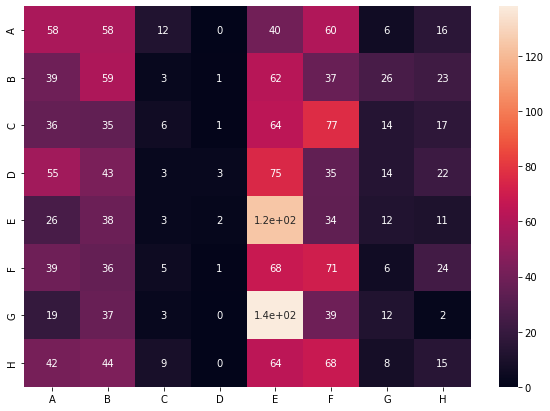

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array = confusion_matrix(testing_label, reg_log_pred)

df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGH"],columns = [i for i in "ABCDEFGH"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [69]:
model = RandomForestClassifier()
model.fit(training_data, training_label)

RandomForestClassifier()

In [72]:
y_pred = model.predict(testing_data)

In [75]:
accuracy = accuracy_score(testing_label, y_pred)
accuracy

0.681

In [94]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2)
model.fit(training_data, training_label)
y_pred = model.predict(testing_data)
accuracy = accuracy_score(testing_label, y_pred)
print("accuracy", accuracy)

accuracy 0.69


In [95]:
importance = model.feature_importances_
importance

array([0.056752  , 0.0549307 , 0.08069495, 0.08130291, 0.2064616 ,
       0.06775917, 0.00273492, 0.08436052, 0.06757942, 0.08752186,
       0.05376661, 0.07564078, 0.08049455])

<AxesSubplot:>

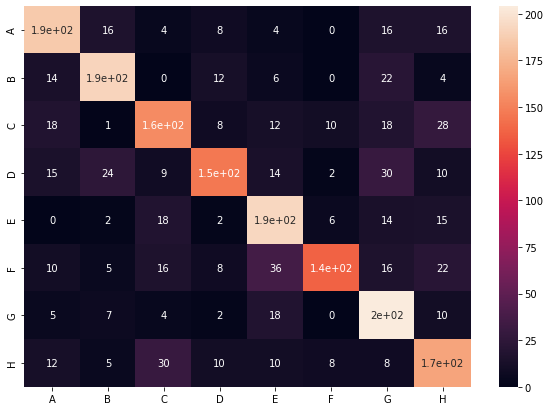

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array = confusion_matrix(testing_label, y_pred)

df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGH"],columns = [i for i in "ABCDEFGH"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### DecisionTree

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [101]:
model = DecisionTreeClassifier()



In [102]:
model.fit(training_data, training_label)


DecisionTreeClassifier()

In [103]:
y_pred = model.predict(testing_data)

In [104]:
accuracy = accuracy_score(testing_label, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.663


<AxesSubplot:>

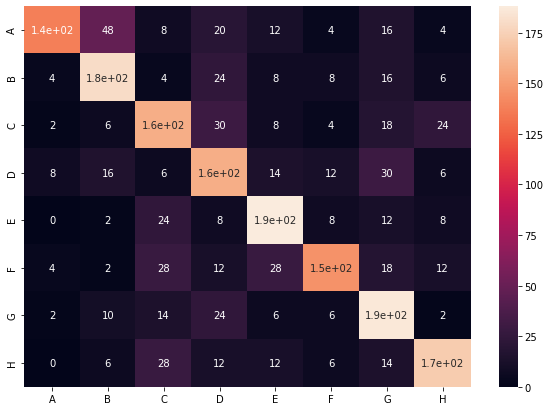

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array = confusion_matrix(testing_label, y_pred)

df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGH"],columns = [i for i in "ABCDEFGH"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#### Coloured Progress Bar 

In [16]:
import time
import enlighten

manager = enlighten.get_manager()
ticks = manager.counter(total=100, desc="Ticks", unit="ticks", color="red")
tocks = manager.counter(total=20, desc="Tocks", unit="tocks", color="blue")

for num in range(100):
    time.sleep(0.1)  # Simulate work
    print("The quick brown fox jumps over the lazy dog. {}".format(num))
    ticks.update()
    if not num % 5:
        tocks.update()

manager.stop()

The quick brown fox jumps over the lazy dog. 0
The quick brown fox jumps over the lazy dog. 1
The quick brown fox jumps over the lazy dog. 2
The quick brown fox jumps over the lazy dog. 3
The quick brown fox jumps over the lazy dog. 4
The quick brown fox jumps over the lazy dog. 5
The quick brown fox jumps over the lazy dog. 6
The quick brown fox jumps over the lazy dog. 7
The quick brown fox jumps over the lazy dog. 8
The quick brown fox jumps over the lazy dog. 9
The quick brown fox jumps over the lazy dog. 10
The quick brown fox jumps over the lazy dog. 11
The quick brown fox jumps over the lazy dog. 12
The quick brown fox jumps over the lazy dog. 13
The quick brown fox jumps over the lazy dog. 14
The quick brown fox jumps over the lazy dog. 15
The quick brown fox jumps over the lazy dog. 16
The quick brown fox jumps over the lazy dog. 17
The quick brown fox jumps over the lazy dog. 18
The quick brown fox jumps over the lazy dog. 19
The quick brown fox jumps over the lazy dog. 20
Th

#### Black Progress Bar 

In [23]:
# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fi
        ll character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration-1 == total: 
        print()

#### Timer 

In [ ]:
for i in range(1,21):
    print(f'\r{i}{" senconds"}',end='\r')
    sleep(0.5)